## 課題2
データセット`subject2.csv`を用いて変数$y$に対する$x$の$n$次多項式(最大字数4)の中から最も望ましい推定式を求めなさい。

### 多項式フィッティング
$$
y(x, w) = w_{0} + w_{1}x + w_{2}x^{2} + w_{3}x^{3} + w_{4}x^{4}
$$

In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
from collections import OrderedDict
import matplotlib.pyplot as plt

df = pd.read_csv("./subject2.csv")

In [10]:
df["x^2"] = df["x"].map(lambda x: x ** 2)
df["x^3"] = df["x"].map(lambda x: x ** 3)
df["x^4"] = df["x"].map(lambda x: x ** 4)
df["bias"] = np.ones(len(df))
df.head()

,x,y,x^2,x^3,x^4,bias
0,0.0,-0.94,0.00,0.000,0.0000,1.0
1,0.1,-1.34,0.01,0.001,0.0001,1.0
2,0.2,0.85,0.04,0.008,0.0016,1.0
3,0.3,0.92,0.09,0.027,0.0081,1.0
4,0.4,0.48,0.16,0.064,0.0256,1.0


In [11]:
cols = [
    ["x"],
    ["x", "x^2"],
    ["x", "x^2", "x^3"],
    ["x", "x^2", "x^3", "x^4"]
]
results = OrderedDict()
y = df["y"].values
for idx, col in enumerate(cols):
    X = df[col].values
    X = sm.add_constant(X)
    res = sm.OLS(y, X, has_const=True).fit()
    results[idx]= res

In [12]:
results[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1270.
Date:                Sun, 23 Jul 2017   Prob (F-statistic):           3.62e-46
Time:                        21:21:04   Log-Likelihood:                -178.97
No. Observations:                  71   AIC:                             361.9
Df Residuals:                      69   BIC:                             366.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7819      0.717     -2.485      0.015      -3.212      -0.351
x1             6.3000      0.177     35.637      0.000       5.947       6.653
==============================================================================
Omnibus:                        6.431   Durbin-Watson:                   0.245
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                5.855
Skew:                          -0.689   Prob(JB):                       0.0535
Kurtosis:                       3.282   Cond. No.                         8.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
results[1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     1049.
Date:                Sun, 23 Jul 2017   Prob (F-statistic):           7.79e-52
Time:                        21:21:04   Log-Likelihood:                -161.37
No. Observations:                  71   AIC:                             328.7
Df Residuals:                      68   BIC:                             335.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.8147      0.831     -6.997      0.000      -7.473      -4.156
x1             9.8068      0.549     17.869      0.000       8.712      10.902
x2            -0.5010      0.076     -6.605      0.000      -0.652      -0.350
==============================================================================
Omnibus:                        6.426   Durbin-Watson:                   0.396
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                2.589
Skew:                           0.073   Prob(JB):                        0.274
Kurtosis:                       2.076   Cond. No.                         76.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
results[2].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     4662.
Date:                Sun, 23 Jul 2017   Prob (F-statistic):           1.10e-77
Time:                        21:21:04   Log-Likelihood:                -94.465
No. Observations:                  71   AIC:                             196.9
Df Residuals:                      67   BIC:                             206.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5555      0.425     -1.308      0.195      -1.403       0.292
x1             0.4579      0.529      0.865      0.390      -0.598       1.514
x2             2.8617      0.176     16.225      0.000       2.510       3.214
x3            -0.3203      0.017    -19.344      0.000      -0.353      -0.287
==============================================================================
Omnibus:                        0.677   Durbin-Watson:                   2.471
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.708
Skew:                           0.221   Prob(JB):                        0.702
Kurtosis:                       2.792   Cond. No.                         807.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
results[3].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     3450.
Date:                Sun, 23 Jul 2017   Prob (F-statistic):           7.75e-76
Time:                        21:21:05   Log-Likelihood:                -94.407
No. Observations:                  71   AIC:                             198.8
Df Residuals:                      66   BIC:                             210.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4587      0.519     -0.885      0.380      -1.494       0.577
x1             0.1626      1.042      0.156      0.876      -1.917       2.243
x2             3.0547      0.611      4.996      0.000       1.834       4.276
x3            -0.3633      0.132     -2.759      0.007      -0.626      -0.100
x4             0.0031      0.009      0.330      0.743      -0.016       0.022
==============================================================================
Omnibus:                        0.672   Durbin-Watson:                   2.475
Prob(Omnibus):                  0.715   Jarque-Bera (JB):                0.748
Skew:                           0.216   Prob(JB):                        0.688
Kurtosis:                       2.742   Cond. No.                     9.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

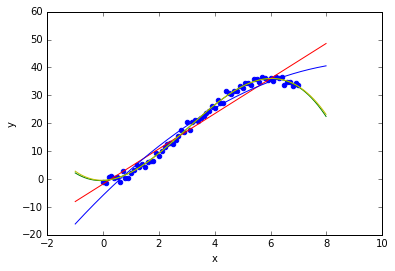

In [24]:
x = df["x"].values
plt.scatter(x, y, marker="o", color="b")
plt.xlabel("x")
plt.ylabel("y")
# 1次の多項式フィッティング
x_ = np.arange(-1, 8, 0.01)
y_1 = -1.7819 + 6.3000 * x_
y_2 = -5.8147 + 9.8068 * x_ - 0.5010 * x_ * x_
y_3 = -0.5555 + 0.4579 * x_ + 2.8617 * x_ * x_ - 0.3203 * x_ * x_ * x_
y_4 = -0.4587 + 0.1626 * x_ + 3.0547 * x_ * x_ - 0.3633 * x_ * x_ * x_ + 0.0031 * x_ * x_ * x_ * x_
plt.plot(x_, y_1, "r-")
plt.plot(x_, y_2, "b-")
plt.plot(x_, y_3, "g-")
plt.plot(x_, y_4, "y-")
plt.savefig("plot.png")